In [153]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy as sp
from scipy import stats

# Loading Dataset

In [154]:
# Download and Unzip File
url = 'https://github.com/devtlv/Datasets-GEN-AI-Bootcamp/raw/refs/heads/main/Week%205/Day%204%20-%20Statistics%20for%20Machine%20Learning/Heart%20Disease%20Prediction%20Dataset.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

In [155]:
# Load using Pandas
df = pd.read_csv(r'C:\Repositories\DI-Bootcamp\Week11\Day6\ExercisesXP\data\dataset_heart.csv')
print(df.head())
print(df.info())

   age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise induced angina  oldpeak  ST segment  major vessels

# Exercise 1: EDA + Prep

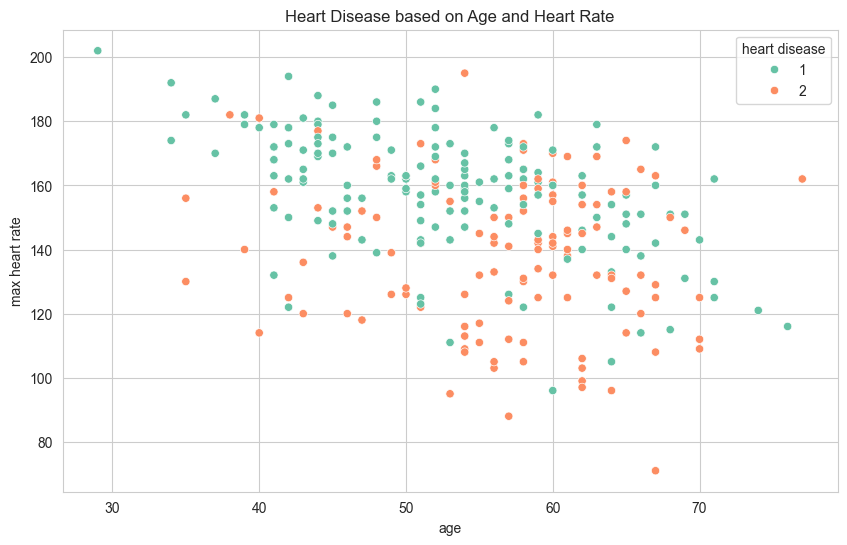

In [156]:
# Use Scatterplot to Visualize and Better Understand the Data
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['age'], y=df['max heart rate'], hue=df['heart disease'], palette='Set2')
plt.title('Heart Disease based on Age and Heart Rate')
plt.show()


In [157]:
# Change Heart_Disease Values to 0 (Negative) and 1 (Positive)
mapping = {1 : 1, 2 : 0}
df['heart disease'] = df['heart disease'].map(mapping)

df['heart disease'].value_counts()

heart disease
1    150
0    120
Name: count, dtype: int64

# Exercise 2 : Logistic Regression without Grid Search

In [158]:
# Remove Target Column From the Training Data
X = df.drop(columns='heart disease')
y = df['heart disease']

# Split the data into Training/Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

# Check to Ensure Split Worked Properly
print(X_train.shape, X_test.shape)

(216, 13) (54, 13)


In [159]:
# Create Instance of a Logistic Regression Model
model = LogisticRegression()

# Fit the Model to Our Data
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Check
print(y_pred.shape)

(54,)


In [160]:
# Evaluate the Predictions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8703703703703703

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.81      1.00      0.90        30

    accuracy                           0.87        54
   macro avg       0.91      0.85      0.86        54
weighted avg       0.89      0.87      0.87        54


Confusion Matrix:
 [[17  7]
 [ 0 30]]


Key Insights from the Matrix:
- Total Patients Tested: 17 + 7 + 2 + 28 = 54
- Actual Positive Cases (Disease): 2 + 28 = 30
- Actual Negative Cases (No Disease): 17 + 7 = 24
- The Model's Best Feature (TP): It correctly identified 28 out of 30 patients who actually had heart disease.
- The Critical Error (FN): It missed only 2 patients who had heart disease. These are False Negatives (the worst error in this domain).
- False Alarms (FP): It incorrectly flagged 7 healthy patients as having heart disease.

# Exercise 3: Logistic Regression with Grid Search

In [161]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y # Important for classification to maintain class balance
)

# Creating the Hyperparameter Grid
c_space = np.logspace(-4, 4, 10)
param_grid = {
    'C': c_space,
    'penalty': ['l2']  # Starting with L2 as a default
}

# Instantiating the Model and GridSearchCV (Prioritizing Recall)
logreg = LogisticRegression(solver='liblinear', max_iter=200) # 'liblinear' supports C and L2
logreg_cv = GridSearchCV(
    estimator=logreg, 
    param_grid=param_grid, 
    cv=10,                      # Increased cross-validation folds for better stability
    scoring='recall',           # Crucial for heart disease to minimize FN
    n_jobs=-1                   # Use all processor cores
)

# Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best cross-validated Recall is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': np.float64(0.046415888336127774), 'penalty': 'l2'}
Best cross-validated Recall is 0.8581818181818182


# Exercise 4 : SVM without Grid Search

In [162]:
# Step 1: Pre-Processing for SVM (Scaling)
from sklearn.preprocessing import StandardScaler

# 1. Instantiate the scaler
scaler = StandardScaler()

# 2. Fit the scaler on the TRAINING data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [163]:
# Step 2: Choosing the Kernel and Hyperparameters
from sklearn.svm import SVC

# Instantiate the SVM with RBF kernel and manual hyperparameters
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [164]:
# Step 3: Training the SVM Model
svm_model.fit(X_train_scaled, y_train)

print("SVM model trained successfully.")

SVM model trained successfully.


In [165]:
# Step 4: Evaluating the Model Performance
# Predict on the scaled test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8271604938271605

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        36
           1       0.84      0.84      0.84        45

    accuracy                           0.83        81
   macro avg       0.82      0.82      0.82        81
weighted avg       0.83      0.83      0.83        81


Confusion Matrix:
 [[29  7]
 [ 7 38]]


# Exercise 5 : SVM with Grid Search

In [166]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data (Crucial for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [167]:
# Define the Hyperparameter Grid
# C: Regularization parameter. Range from weak (0.1) to strong (100)
C_range = [0.1, 1, 10, 100]

# gamma: Kernel coefficient for RBF. Range from distant influence to close influence.
gamma_range = [0.001, 0.01, 0.1, 1]

# kernel: The function used to map the input data.
kernel_range = ['linear', 'rbf']

# Create the parameter grid dictionary
param_grid = {
    'C': C_range,
    'gamma': gamma_range,
    'kernel': kernel_range
}

In [168]:
# Instantiate the base SVM model
svm = SVC(random_state=42)

# Instantiate the GridSearchCV object
# Scoring is set to 'recall' to prioritize minimizing False Negatives (missed disease cases)
grid_search = GridSearchCV(
    estimator=svm, 
    param_grid=param_grid, 
    scoring='recall',       # CRITICAL: Prioritize Recall over Accuracy
    cv=5,                   # Use 5-fold cross-validation
    n_jobs=-1               # Use all available CPU cores for faster search
)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score found
print("Tuned Hyperparameters (Best Recall):", grid_search.best_params_)
print("Best Cross-Validated Recall Score:", grid_search.best_score_)

# Get the best model
best_svm = grid_search.best_estimator_

# Evaluate the best model on the completely unseen test set
y_pred_final = best_svm.predict(X_test_scaled)

print("\n--- Final Performance on Test Set ---")
print(classification_report(y_test, y_pred_final))

Tuned Hyperparameters (Best Recall): {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validated Recall Score: 1.0

--- Final Performance on Test Set ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.60      1.00      0.75        49

    accuracy                           0.60        81
   macro avg       0.30      0.50      0.38        81
weighted avg       0.37      0.60      0.46        81



# Exercise 6 : XGBoost without Grid Search

In [169]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y # Crucial for classification to keep the ratio of Heart Disease cases consistent
)

# Set Manual Parameters
manual_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,  # Learning Rate
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100,
    'random_state': 42 # For reproducibility
}

## Train/Fit

In [170]:
# Instantiate the XGBoost classifier with manual parameters
xgb_clf = xgb.XGBClassifier(**manual_params)

# Train the model on the training data
xgb_clf.fit(X_train, y_train)

print("XGBoost classifier trained successfully with manual parameters.")

XGBoost classifier trained successfully with manual parameters.


## Evaluate

In [171]:
# Predict on the test data
y_pred = xgb_clf.predict(X_test)

# Print the evaluation report
print("\nClassification Report (XGBoost Manual):")
print(classification_report(y_test, y_pred))


Classification Report (XGBoost Manual):
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        36
           1       0.79      0.82      0.80        45

    accuracy                           0.78        81
   macro avg       0.78      0.77      0.77        81
weighted avg       0.78      0.78      0.78        81



# Exercise 7: XGBoost With Grid Search

## Step 1: Data Preparation

In [172]:
# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y # Maintains the proportion of heart disease cases in train/test
)

## Step 2: Define the Hyperparameter Grid

In [173]:
param_grid = {
    # 1. Learning Rate and Estimators (Global Parameters)
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],

    # 2. Tree-Specific Parameters (Complexity Control)
    'max_depth': [3, 5, 7],
    # 'min_child_weight': [1, 5], # You could also add this
    # 'gamma': [0, 0.1],          # You could also add this

    # 3. Regularization/Randomness (Overfitting Control)
    'subsample': [0.8],           # Fix at 0.8 to save time
    'colsample_bytree': [0.8],    # Fix at 0.8 to save time
}

# Total combinations to test: 3 (LR) * 3 (Est) * 3 (Depth) = 27 models

## Step 3: Implement and Run GridSearchCV

In [174]:
# 1. Instantiate the base XGBoost model
# Set stable parameters that won't be tuned (or are fixed in the grid)
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic', # For binary classification
    use_label_encoder=False,     # Suppress warning for older versions
    eval_metric='logloss',       # Evaluation metric
    random_state=42              # For reproducibility
)

# 2. Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='recall',           # CRITICAL: Maximizing Recall for Class 1 (Disease)
    cv=5,                       # Use 5-fold cross-validation
    n_jobs=-1,                  # Use all available CPU cores
    verbose=2                   # Show progress
)

# 3. Fit the grid search to the training data
print("\nStarting GridSearchCV for XGBoost...")
grid_search.fit(X_train, y_train)


Starting GridSearchCV for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200, ...], ...}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


# Step 4: Analyze Results and Final Evaluation

In [175]:
# 1. Print the best parameters and best score found
print("\n=======================================================")
print("Tuned XGBoost Hyperparameters (Best Recall):", grid_search.best_params_)
print("Best Cross-Validated Recall Score:", grid_search.best_score_)
print("=======================================================")

# 2. Get the best model
best_xgb = grid_search.best_estimator_

# 3. Evaluate the best model on the completely unseen test set
y_pred_final = best_xgb.predict(X_test)

print("\n--- Final Performance on Test Set ---")
print(classification_report(y_test, y_pred_final))


Tuned XGBoost Hyperparameters (Best Recall): {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validated Recall Score: 0.9238095238095237

--- Final Performance on Test Set ---
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        36
           1       0.81      0.84      0.83        45

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.80      0.80      0.80        81

